In [3]:
!pip3 install matplotlib

    100% |████████████████████████████████| 12.6MB 120kB/s ta 0:00:011   29% |█████████▍                      | 3.7MB 365kB/s eta 0:00:25
  Using cached https://files.pythonhosted.org/packages/43/17/cd9fa14492dbef2aaf22622db79dba087c10f125473e730cda2f2019c40b/numpy-1.14.5-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/67/4b/141a581104b1f6397bfa78ac9d43d8ad29a7ca43ea90a2d863fe3056e86a/six-1.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6a/8a/718fd7d3458f9fab8e67186b00abdd345b639976bc7fb3ae722e1b026a50/pyparsing-2.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/cf/f5/af2b09c957ace60dcfac112b669c45c8c97e32f94aa8b56da4c6d1682825/python_dateutil-2.7.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7e/3

In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Алгоритмы оптимизации
import torch.optim

In [33]:
def show_contours(objective, 
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(5,5))
    plt.contour(X, Y, res, 100)

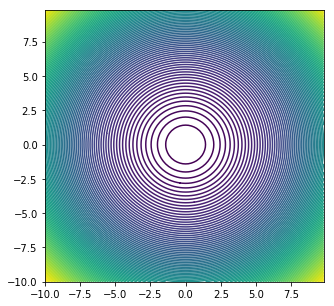

In [34]:
# Функция, которую нужно оптимизировать
def objective(inp):
    return (inp * inp).sum()

show_contours(objective)

In [35]:
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.SGD([x], lr=0.01) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-35 *
       [[ 8.0224],
        [ 8.0224]]) <- result


(2, 4000)


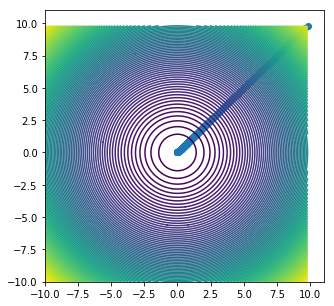

In [36]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

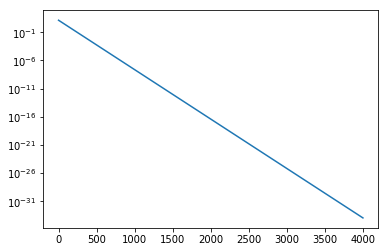

In [37]:
target = np.array([[0, 0]]).T
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plt.semilogy(error_hist);

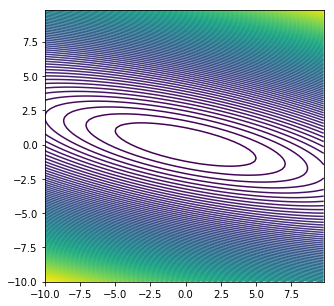

In [38]:
# Функция, которую нужно оптимизировать
def objective(inp):
#     print(inp.transpose(0, 1).shape)
    gramma = np.array([[1.0, 2.0], [2.0, 10.0]])
    res = (inp.transpose(1, 0) @ (gramma @ inp)).sum()
    return res

show_contours(objective)

In [39]:
# Функция, которую нужно оптимизировать
def objective(inp):
    gramma = torch.tensor([[1.0, 2.0], [2.0, 10.0]])
    res = (inp.transpose(1, 0).mm(gramma.mm(inp))).sum()
    return res


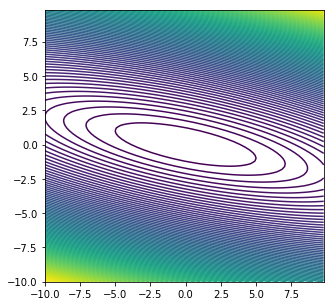

In [40]:
def obj(x):
    x = torch.from_numpy(x).float()
    return (objective(x).numpy())
show_contours(obj)

# Задача 1
Решить задачу оптимизации objective, указанного выше несколькими различными способами: 

1) SGD 

2) SGD с моментом

3) Adam

4) RProp

Какой метод обеспечивает быстрейшее схождение к решению? Обсудить результат (делать графики сходимости).

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-20 *
       [[ 5.8063],
        [-1.2322]]) <- result
(2, 4000)


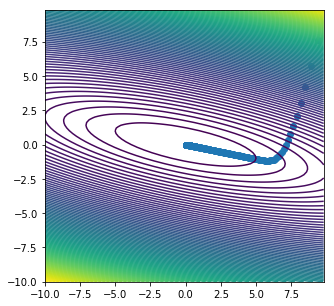

In [41]:
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.SGD([x], lr=0.01) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(obj)
plt.scatter(history_arr[0, :], history_arr[1, :]);

In [43]:
plots = []

In [44]:
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plots.append(error_hist)

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-45 *
       [[-1.4013],
        [ 0.0000]]) <- result
(2, 4000)


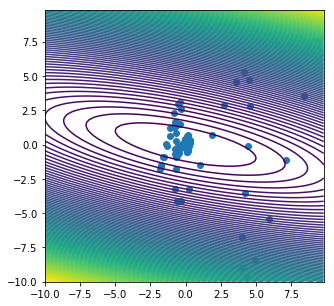

In [45]:
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.SGD([x], lr=0.01, momentum = 0.9) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(obj)
plt.scatter(history_arr[0, :], history_arr[1, :]);

In [46]:
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plots.append(error_hist)

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-07 *
       [[ 6.7422],
        [ 6.9273]]) <- result
(2, 4000)


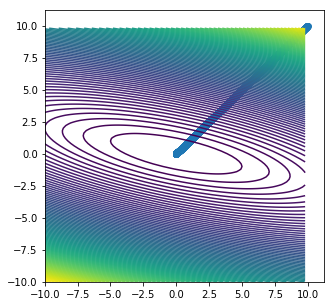

In [47]:
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.Adam([x], lr=0.01) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(obj)
plt.scatter(history_arr[0, :], history_arr[1, :]);

In [48]:
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plots.append(error_hist)

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-07 *
       [[-7.4562],
        [-7.4562]]) <- result
(2, 4000)


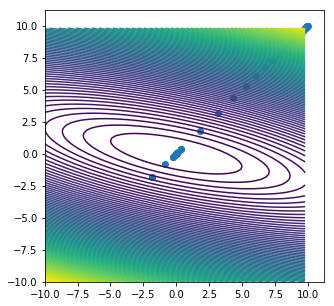

In [49]:
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.Rprop([x], lr=0.01) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(obj)
plt.scatter(history_arr[0, :], history_arr[1, :]);

In [50]:
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plots.append(error_hist)

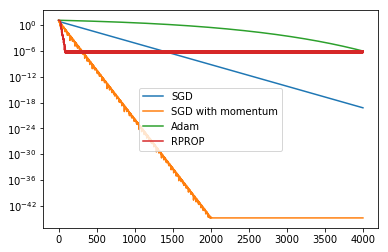

In [52]:
for plot in plots:
    plt.semilogy(plot)
plt.legend(["SGD", "SGD with momentum", "Adam", "RPROP"])
plt.show()

# Задача 2
Решить задачу оптимизации невыпуклой функции $f(x) = 10\sin x \sin y  + x^2 + y^2$, стартуя из точки $x_0 = 10.0, y_0 = 10.0$ всеми подходами, указанными выше.
Какой из методов решает задачу лучше всего и быстрее? Зависит ли решение от начального приближения? Обсудить, почему.

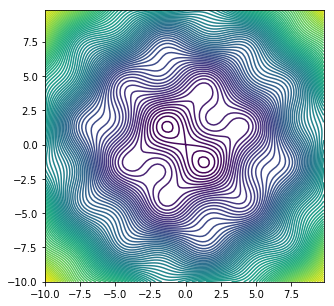

In [53]:
def objective(inp):
    res = 10 * torch.sin(inp).prod() + (inp**2).sum()
    return res

def np_objective(inp):
    res = 10 * np.sin(inp).prod() + (inp**2).sum()
    return res
show_contours(np_objective)

In [54]:
target = np.array([[0, 0]]).T # <- extrema
plots = [] # error plots 

In [55]:
# SGD
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.SGD([x], lr=0.01) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

tensor([[ 10.],
        [ 10.]]) <- start point
tensor([[ 2.4532],
        [ 2.4532]]) <- result


(2, 4000)


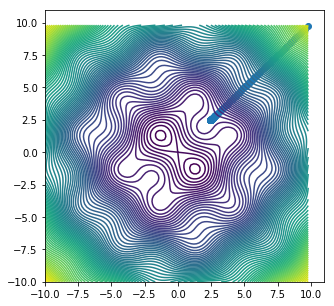

In [56]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(np_objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);